In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import explained_variance_score

In [2]:
#Setting columns names
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']

In [3]:
#reading tsv file
df = pd.read_csv('E:/Repos/Automobile/auto-mpg.tsv', sep = '\s+', names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name'] )


In [4]:
#checking for 'null' values
df.isnull().values.any()

False

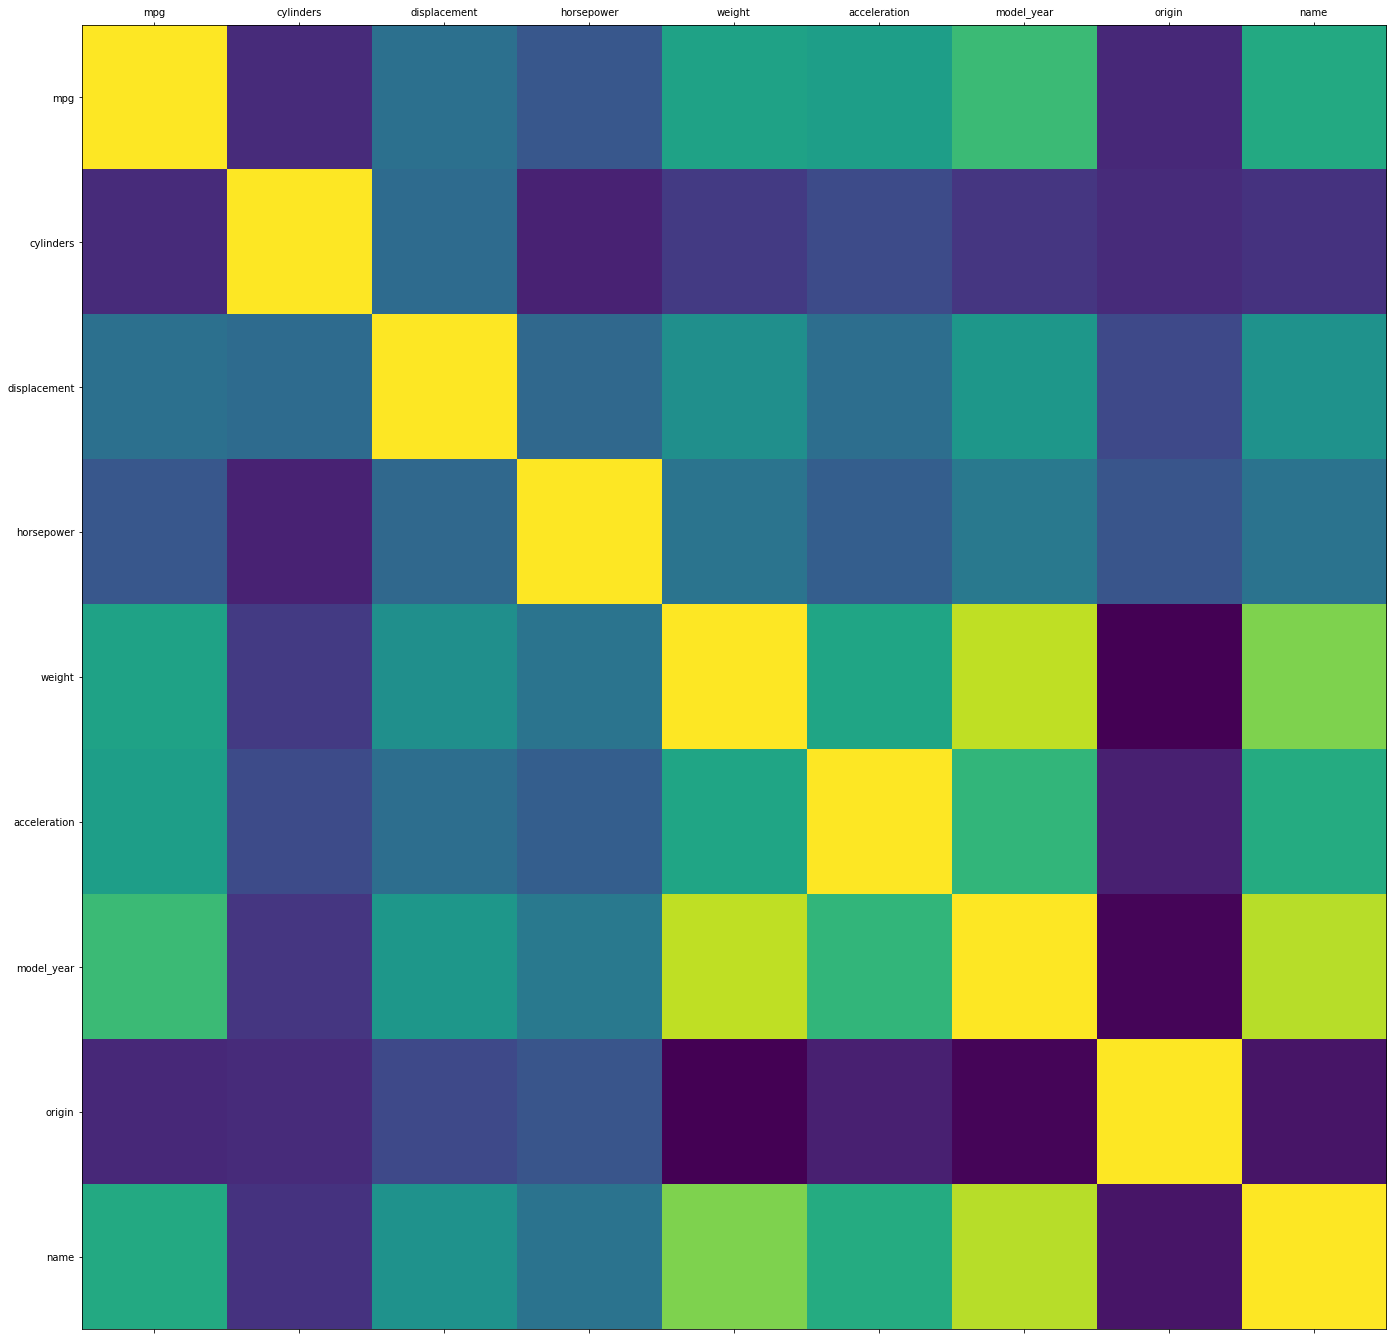

In [5]:
#correlation graph
def plot_corr (df, size=24):
    corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
plot_corr(df)

In [6]:
#verifying missing value 

print("# Linhas no dataframe {0}".format(len(df)))
for x in columns:
    print("# Linhas missing em " + x + " {0}".format(len(df.loc[df[x] == '?']))) 


# Linhas no dataframe 398
# Linhas missing em mpg 0
# Linhas missing em cylinders 0
# Linhas missing em displacement 0
# Linhas missing em horsepower 6
# Linhas missing em weight 0
# Linhas missing em acceleration 0
# Linhas missing em model_year 0
# Linhas missing em origin 0
# Linhas missing em name 0


In [7]:
#Removing missing values from all df  
#df = df[~df.isin(['?'])]
df = df[df.horsepower != "?"]

In [8]:
#verifying removed values 
print("# Linhas no dataframe {0}".format(len(df)))
for x in columns:
    print("# Linhas missing em " + x + " {0}".format(len(df.loc[df[x] == '?']))) 


# Linhas no dataframe 392
# Linhas missing em mpg 0
# Linhas missing em cylinders 0
# Linhas missing em displacement 0
# Linhas missing em horsepower 0
# Linhas missing em weight 0
# Linhas missing em acceleration 0
# Linhas missing em model_year 0
# Linhas missing em origin 0
# Linhas missing em name 0


In [9]:
Y = df['mpg']

In [10]:
#defining both features
features1 = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
features2 = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
X1 = df[features1]
X2 = df[features2]


In [11]:
#splitting the data 1
X1_train, X1_test, y_train, y_test = train_test_split(X1, Y, test_size=0.25, random_state = 42, shuffle = True)
X1_train
#splitting the data 2
X2_train, X2_test, y_train, y_test = train_test_split(X2, Y, test_size=0.25, random_state = 42, shuffle = True)

In [12]:
#deleting missing values
#substitute_0_to_mean = SimpleImputer(missing_values = '?', strategy = 'most_frequent')

#X1_train = substitute_0_to_mean.fit_transform(X1_train)
#X1_test = substitute_0_to_mean.fit_transform(X1_test)
#X2_train = substitute_0_to_mean.fit_transform(X2_train)
#X2_test = substitute_0_to_mean.fit_transform(X2_test)



In [13]:
#training SVR model for X1 Dataset
model1 = svm.SVR()
model1.fit(X1_train, y_train)

SVR()

In [14]:
#making prediction SVR model for X1 Dataset
predict_model1 = model1.predict(X1_test)

In [15]:
print("Accuracy: {0:.4f}".format(explained_variance_score(y_test, predict_model1)))

Accuracy: 0.7149


In [16]:
#training and Predicting RandomForestRegressor model for X1 Dataset
model2 = RandomForestRegressor(max_depth=5, random_state=1, n_estimators = 100)
model2.fit(X1_train, y_train)

predict_model2 = model2.predict(X1_test)

In [17]:
print("Accuracy: {0:.4f}".format(explained_variance_score(y_test, predict_model2)))

Accuracy: 0.8714


In [18]:
#training predicting SVR model for X2 Dataset
model1_1 = svm.SVR()
model1_1.fit(X2_train, y_train)
predict_model1_1 = model1_1.predict(X2_test)
print("Accuracy: {0:.4f}".format(explained_variance_score(y_test, predict_model1_1)))


Accuracy: 0.7148


In [19]:
#training and Predicting RandomForestRegressor model for X2 Dataset
model2_2 = RandomForestRegressor(max_depth=5, random_state=1, n_estimators = 100)
model2_2.fit(X2_train, y_train)

predict_model2_2 = model2_2.predict(X2_test)

In [20]:
print("Accuracy: {0:.4f}".format(explained_variance_score(y_test, predict_model2_2)))

Accuracy: 0.7083
